# Tutorial 2: Random Variable and Distributions

- Point estimation is deceiving
- Use distributions and hypothesis testing
    - Basis of almost all quantitative finance topics

## Uniform Distribution

In [39]:
import random 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
def dice():
    number = [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print series

[5 5 2 ..., 6 1 4]


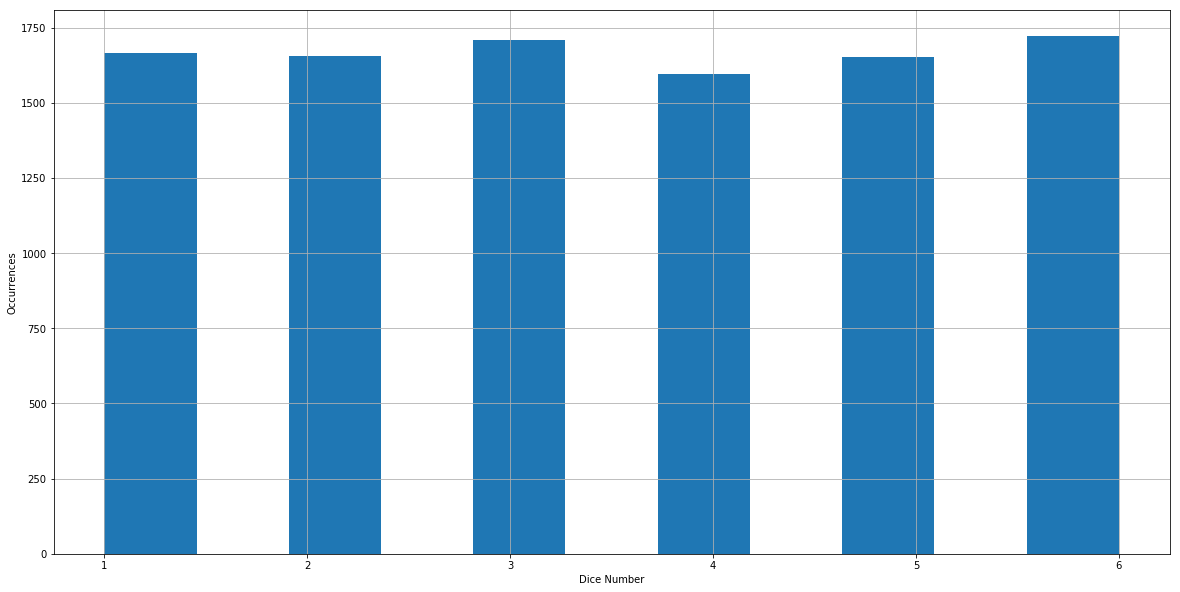

In [41]:
plt.figure(figsize = (20,10))
plt.hist(series,bins=11, align='mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurrences')
plt.grid()
plt.show()

In [42]:
print len([x for x in series if x <= 3])/float(len(series))
print np.mean(series)

0.5029
3.5081


**population mean** vs **sample mean** 
- population mean is the real mean, taking into account the number of observations (theoretical mean)
- sample mean doesn't equal the theoretical population mean unless the observations approach infinity

## Binomial Distribution 

- is a discrete probability distribution of the number of successes in a sequence of n independent experiments

**Example**
- the market has 50% probability to go up and likewise to go down, we observe over the next 10 days
    - *What is the distribution of the number of days it goes up?*

In [43]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a <= 7:
        return 1
    else:
        return 0

This takes the output of trial() (either 1 or 0) and adds it up for the 10 experiments

In [44]:
res = [trial() for x in range(10)]
print sum(res)

9


To see the binomial distribution, we have to experiment N times, and if N is large enough, it will approach the theoretical probability.

In [45]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
 
print binomial(8)

0.2331


To simulate the probability for each possible outcome:

In [46]:
prob = [] 
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob, index=range(1,11))
print prob_s

1     0.0000
2     0.0020
3     0.0077
4     0.0365
5     0.0961
6     0.2040
7     0.2636
8     0.2320
9     0.1234
10    0.0274
dtype: float64


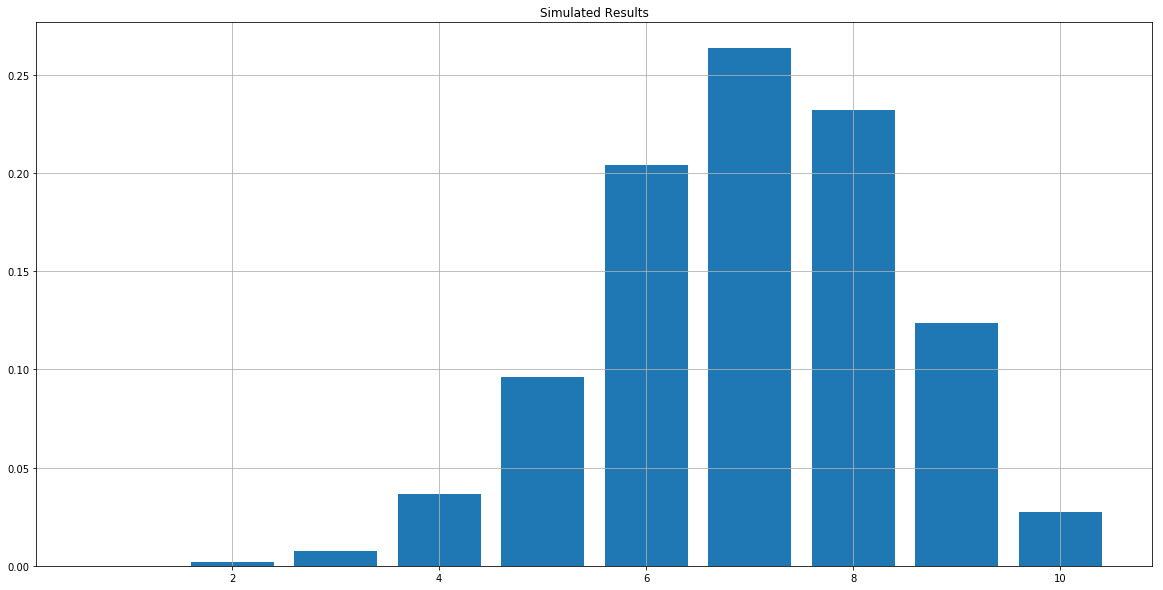

In [47]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.title("Simulated Results")
plt.grid()
plt.show()


## Normal Distribution

Standard normal distribution:

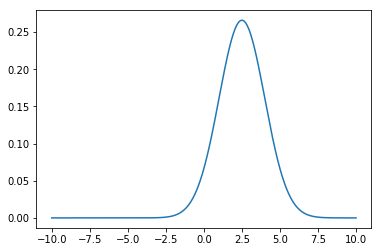

In [48]:
import pylab
from scipy.stats import norm

x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=2.5, scale=1.5)    # for example
pylab.plot(x,y)
pylab.show()

It is believed that the return on an asset over a short time follows normal distribution.

In [49]:
import quandl
quandl.ApiConfig.api_key = 'PGNosZasWCLCBMfGND4h'

In [53]:
spy_table = quandl.get('BCIW/_SPXT')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

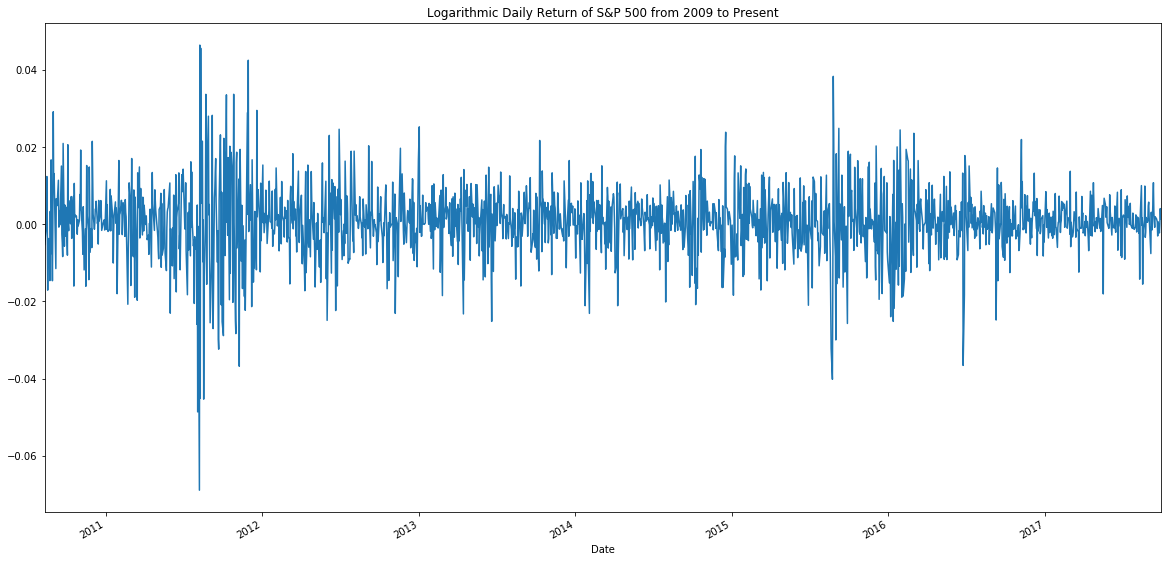

In [55]:
plt.figure(figsize=(20,10))
spy.log_return.plot()
plt.title("Logarithmic Daily Return of S&P 500 from 2009 to Present")
plt.show()

Density chart of the returns:

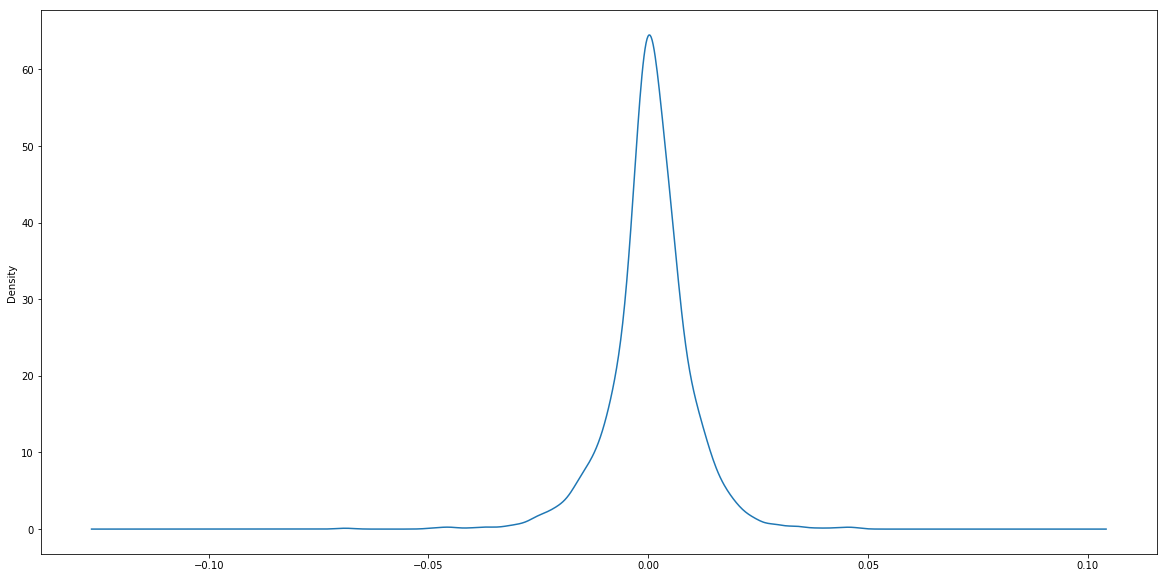

In [57]:
plt.figure(figsize=(20,10))
spy.log_return.plot.density()
plt.show()

The normal distribution with different means and variances 

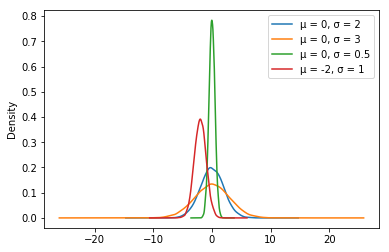

In [59]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()